![alternative text](Questions/Photos/9.png)

In [11]:
# Importing in-built libraries
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as control
import scipy.signal as signal

In [12]:
# Given data
T = 0.1
d1 = 0.9
d2 = 0.8
wp = 0.1 * np.pi
ws = 0.35 * np.pi
print(wp)
print(ws)

0.3141592653589793
1.0995574287564276


In [13]:
d1db = -20 * np.log10(d1)
d2db = -20 * np.log10(d2)

In [14]:
# Frequency Mapping
omegap = (2/T) * np.tan(wp/2)
omegas = (2/T) * np.tan(ws/2)
print(omegap)
print(omegas)

3.1676888064907254
12.25601576279864


In [15]:
# Determining Order of the Filter
N, wc = signal.cheb1ord(omegap, omegas, d1db, d2db, analog=True)
print('Order of Filter = ', N)
print(wc)

Order of Filter =  1
3.1676888064907254


In [16]:
# Determining Analog T.F H(s)
num, den = signal.cheby1(N=N, rp=1, Wn=wc, btype='high', analog=True)
trans1 = control.tf(num,den)
print('Analog Transfer Function of ChebyShev filter H(s) = ', trans1)

Analog Transfer Function of ChebyShev filter H(s) =  
    s
---------
s + 1.612


In [17]:
# Transforming Analog Filter to Digital Filter using BLT
num1, den1 = signal.bilinear(num, den, T)
trans2 = control.tf(num1, den1)
print('Digital Transfer Function of ChebyShev filter H(z) = ', trans2)

Digital Transfer Function of ChebyShev filter H(z) =  
0.1104 s - 0.1104
-----------------
   s + 0.7792


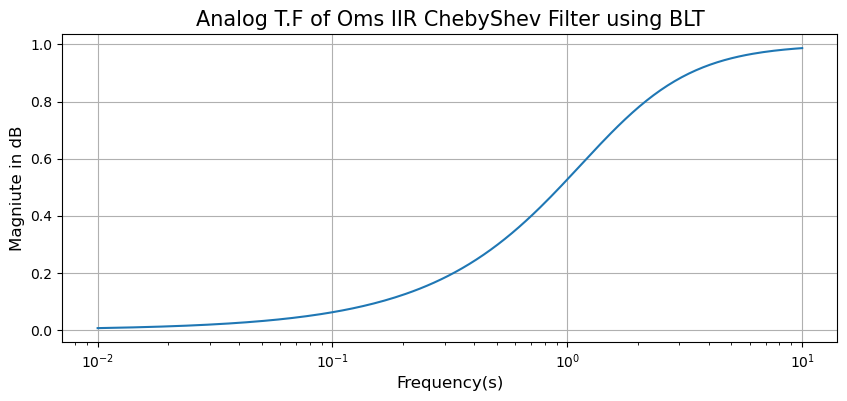

In [18]:
# Plotting Analog T.F
w, h = signal.freqs(num, den)
h_db = np.abs(h)
plt.figure(figsize = (10,4))
plt.grid()
plt.xlabel('Frequency(s)', fontsize=12)
plt.ylabel('Magniute in dB', fontsize=12)
plt.title('Analog T.F of Oms IIR ChebyShev Filter using BLT', fontsize=15)
plt.semilogx(w, h_db)
plt.show()

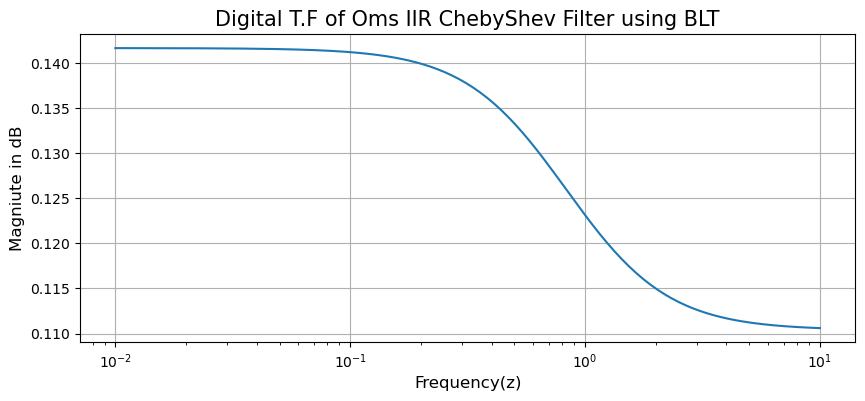

In [19]:
# Plotting Digital T.F
w1, h1 = signal.freqs(num1, den1)
h1_db = np.abs(h1)
plt.figure(figsize = (10,4))
plt.grid()
plt.xlabel('Frequency(z)', fontsize=12)
plt.ylabel('Magniute in dB', fontsize=12)
plt.title('Digital T.F of Oms IIR ChebyShev Filter using BLT', fontsize=15)
plt.semilogx(w1, h1_db)
plt.show()